# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines= newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines= newsapi.get_everything(
    q="Ethereum",
    language="en"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound","negative", "neutral", "positive","text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


compound  negative  neutral  positive  \
0   -0.6705     0.199    0.737     0.064   
1    0.0000     0.000    1.000     0.000   
2    0.2144     0.000    0.947     0.053   
3    0.2263     0.000    0.951     0.049   
4    0.6808     0.000    0.838     0.162   

                                                text  
0  A former Microsoft software engineer from Ukra...  
1  PayPal has partnered with cryptocurrency compa...  
2  PayPal is bringing its newly-announced support...  
3  Two days ago, about $1 billion worth of bitcoi...  
4  PayPal is rolling out cryptocurrency support l...

In [7]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound","negative", "neutral", "positive","text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


compound  negative  neutral  positive  \
0    0.0000     0.000    1.000     0.000   
1    0.0000     0.000    1.000     0.000   
2    0.2144     0.000    0.947     0.053   
3    0.6808     0.000    0.838     0.162   
4   -0.4215     0.132    0.783     0.085   

                                                text  
0  PayPal has partnered with cryptocurrency compa...  
1  Breitling is partnering with Arianee to issue ...  
2  PayPal is bringing its newly-announced support...  
3  PayPal is rolling out cryptocurrency support l...  
4  Portions of the global economy melted down in ...

In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

compound   negative    neutral   positive
count  20.000000  20.000000  20.000000  20.000000
mean   -0.032560   0.059900   0.886400   0.053650
std     0.477931   0.084696   0.096605   0.068255
min    -0.718400   0.000000   0.716000   0.000000
25%    -0.386925   0.000000   0.811000   0.000000
50%     0.000000   0.000000   0.891500   0.045000
75%     0.232225   0.110500   0.969250   0.065250
max     0.822500   0.215000   1.000000   0.229000

In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

compound   negative    neutral   positive
count  17.000000  17.000000  17.000000  17.000000
mean    0.247835   0.007765   0.921529   0.070706
std     0.351020   0.032015   0.089622   0.082288
min    -0.421500   0.000000   0.703000   0.000000
25%     0.000000   0.000000   0.873000   0.000000
50%     0.177900   0.000000   0.947000   0.053000
75%     0.542300   0.000000   1.000000   0.123000
max     0.946800   0.132000   1.000000   0.297000

### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words] 
    tokens = [word.lower() for word in lem if word.lower() not in sw]
            
    return tokens


In [13]:
# Create a new tokens column for bitcoin

bitcoin_tokens = bitcoin_df.copy()

tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})
    
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens'] = tokens_df

bitcoin_tokens.head()

compound  negative  neutral  positive  \
0   -0.6705     0.199    0.737     0.064   
1    0.0000     0.000    1.000     0.000   
2    0.2144     0.000    0.947     0.053   
3    0.2263     0.000    0.951     0.049   
4    0.6808     0.000    0.838     0.162   

                                                text  \
0  A former Microsoft software engineer from Ukra...   
1  PayPal has partnered with cryptocurrency compa...   
2  PayPal is bringing its newly-announced support...   
3  Two days ago, about $1 billion worth of bitcoi...   
4  PayPal is rolling out cryptocurrency support l...   

                                              tokens  
0  [former, microsoft, software, engineer, ukrain...  
1  [paypal, ha, partnered, cryptocurrency, compan...  
2  [paypal, bringing, newlyannounced, support, cr...  
3  [two, day, ago, billion, worth, bitcoin, sat, ...  
4  [paypal, rolling, cryptocurrency, support, lat...

In [14]:
# Create a new tokens column for ethereum

ethereum_tokens = ethereum_df.copy()

tokenized= []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})
    
etherium_tokens_df= pd.DataFrame(tokenized)
ethereum_tokens['tokens'] = etherium_tokens_df

ethereum_tokens.head()

compound  negative  neutral  positive  \
0    0.0000     0.000    1.000     0.000   
1    0.0000     0.000    1.000     0.000   
2    0.2144     0.000    0.947     0.053   
3    0.6808     0.000    0.838     0.162   
4   -0.4215     0.132    0.783     0.085   

                                                text  \
0  PayPal has partnered with cryptocurrency compa...   
1  Breitling is partnering with Arianee to issue ...   
2  PayPal is bringing its newly-announced support...   
3  PayPal is rolling out cryptocurrency support l...   
4  Portions of the global economy melted down in ...   

                                              tokens  
0  [paypal, ha, partnered, cryptocurrency, compan...  
1  [breitling, partnering, arianee, issue, new, k...  
2  [paypal, bringing, newlyannounced, support, cr...  
3  [paypal, rolling, cryptocurrency, support, lat...  
4  [portions, global, economy, melted, emerging, ...

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

btc = []
for i in bitcoin_tokens['text']:
    btc_list = i
    btc.append(btc_list)

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_15.items()), columns=['Bigram', 'Count'])  
    
bigram_counter(btc)

Bigram  Count
0         (char, paypal)      4
1    (virtual, currency)      3
2    (former, microsoft)      2
3  (microsoft, software)      2
4   (software, engineer)      2
5    (engineer, ukraine)      2
6          (ukraine, ha)      2
7        (ha, sentenced)      2
8      (sentenced, nine)      2
9           (nine, year)      2

In [17]:
# Generate the Ethereum N-grams where N=2
eth = []
for i in ethereum_tokens['text']:
    eth_list = i
    eth.append(eth_list)
    

bigram_counter(eth)

Bigram  Count
0               (buy, sell)      5
1            (char, london)      4
2         (london, reuters)      4
3         (reuters, paypal)      4
4        (paypal, holdings)      4
5           (holdings, inc)      4
6  (joined, cryptocurrency)      4
7  (cryptocurrency, market)      4
8       (market, wednesday)      4
9     (wednesday, allowing)      4

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
btc_words = []
for text in bitcoin_tokens['tokens']:
    for word in text:
        btc_words.append(word)

token_count(btc_words)

[('char', 20),
 ('bitcoin', 12),
 ('reuters', 7),
 ('cryptocurrency', 6),
 ('ha', 5),
 ('paypal', 5),
 ('million', 4),
 ('user', 4),
 ('cryptocurrencies', 4),
 ('first', 4)]

In [20]:
# Get the top 10 words for Ethereum
eth_words = []
for text in ethereum_tokens['tokens']:
    for word in text:
        eth_words.append(word)

token_count(eth_words)

[('char', 17),
 ('paypal', 12),
 ('cryptocurrency', 10),
 ('bitcoin', 10),
 ('us', 7),
 ('wednesday', 7),
 ('buy', 6),
 ('hold', 6),
 ('sell', 6),
 ('digital', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

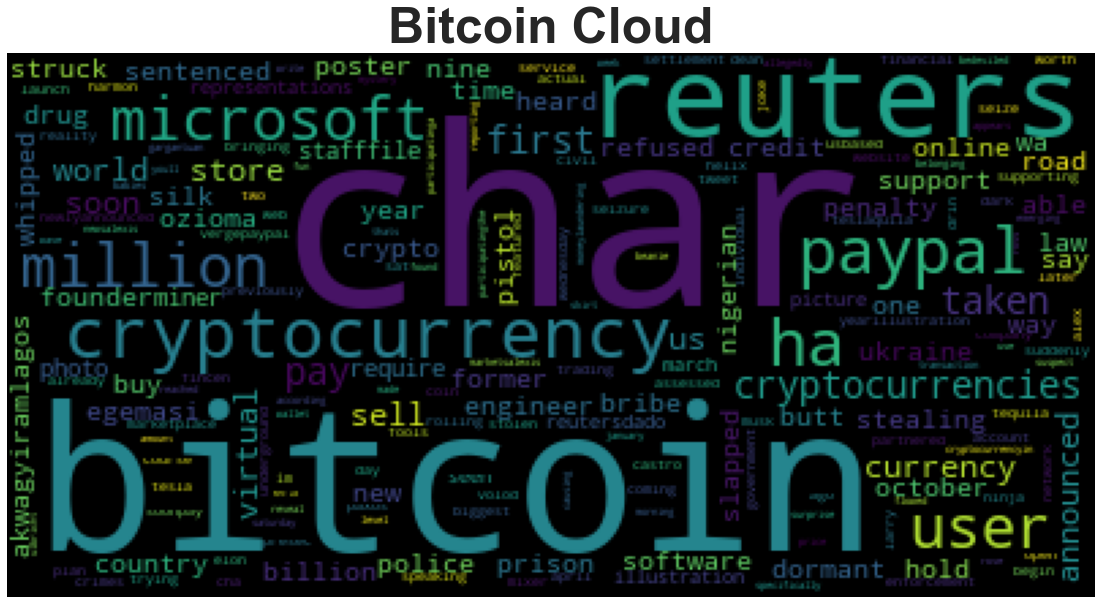

In [22]:
# Generate the Bitcoin word cloud
def processed_text(corpus): 
    big_string = ' '.join(corpus)
    return big_string

bitcoin_cloud = processed_text(btc_words)

wc = WordCloud(collocations=False).generate(bitcoin_cloud)
fig = plt.figure()
plt.imshow(wc)
plt.title('Bitcoin Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

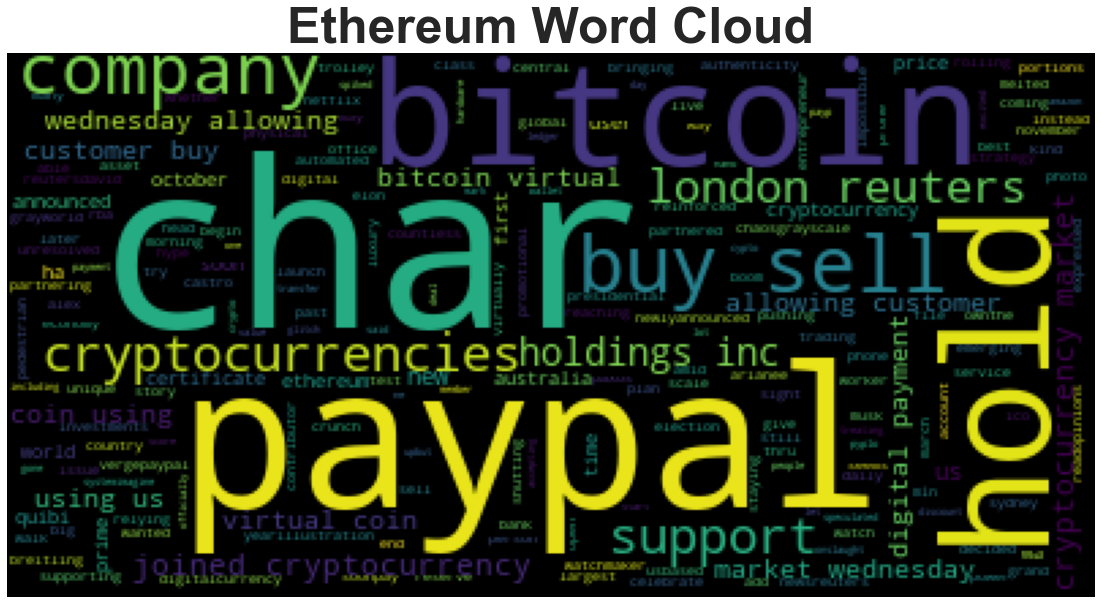

In [23]:
# Generate the Ethereum word cloud

eth_words = processed_text(eth_words)

fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [27]:
bitcoin_concat = []
for i in bitcoin_tokens['text']:
    list_1 = i
    bitcoin_concat.append(list_1)
    
big_string_bitcoin = ' '.join(bitcoin_concat)
big_string_bitcoin

'A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft\'s online store. From 2016 to 2018, Volod… [+3307 chars] PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars] PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] Two days ago, about $1 billion worth of bitcoin that had sat dormant since the seizure of the Silk Road marketplace in 2013, one of the biggest underground drug websites on the dark web, suddenly cha… [+1297 chars] PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced 

In [28]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(big_string_bitcoin)
bitcoin_ner.user_data['title'] = 'Bitcoin text processing: NER'
displacy.render(bitcoin_ner, style='ent')

In [29]:
# List all Entities
for ent in bitcoin_ner.ents:
    print (ent, ent.label_)

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
PayPal PRODUCT
Paxos ORG
PayPal PRODUCT
U.S. GPE
PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
Two days ago DATE
about $1 billion MONEY
bitcoin GPE
the Silk Road FAC
2013 DATE
one CARDINAL
PayPal PRODUCT
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
The Financial Crimes Enforcement Network ORG
$60 million MONEY
Larry Dean Harmon PERSON
Helix GPE
Coin Ninja ORG
first ORDINAL
2018 DATE
2020 DATE
Tesla Tequila ORG
April DATE
Elon Musk ORG
Teslaquila WORK_OF_ART
U.S. GPE
Individual X WORK_OF_ART
4 CARDINAL
4 CARDINAL
one CARDINAL
above $14,000 MONEY
Saturday DATE
morning TIME
first ORDINAL
January 2018 DATE
Reuters ORG
Beanie Babies WORK_OF_ART
$1 billion MONEY
Silk Road ORG
Ross Ulbricht PERSON
this week DATE
1 CARDINAL
1 CARDINAL
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
World News ORG
Reuters ORG
O

---

## Ethereum NER

In [30]:
# Concatenate all of the bitcoin text together
eth_concat = []
for i in ethereum_tokens['text']:
    list_1 = i
    eth_concat.append(list_1)
    
big_string_ethereum = ' '.join(eth_concat)
big_string_ethereum

'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars] Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars] PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars] Portions of the global economy melted down in 2020, but an emerging asset class seems to have reinforced its staying power amid the ch

In [31]:
# Run the NER processor on all of the text
ethereum_ner = nlp(big_string_ethereum)
ethereum_ner.user_data['title'] = 'Ethereum text processing: NER'
displacy.render(ethereum_ner, style='ent')

In [32]:
# List all Entities
for ent in ethereum_ner.ents:
    print (ent, ent.label_)

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
Arianee PERSON
PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
PayPal PRODUCT
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
2020 DATE
Grayscale Investments ORG
the Reserve Bank of Australia ORG
Sydney GPE
Australia GPE
March 7, 2017 DATE
David Gray PERSON
World News ORG
Reuters ORG
2020 DATE
U.S. GPE
Wednesday DATE
morning TIME
Elon Musk WORK_OF_ART
Quibi ORG
PayPal PRODUCT
Netflix PERSON
Daily Crunch WORK_OF_ART
October 21, 2020 DATE
November DATE
8 DATE
2020 DATE
5 CARDINAL
ICO ORG
Bitcoin GPE
Paypal ORG
1 CARDINAL
Bitcoin GPE
Ethereum GPE
bitcoin GPE
Payp PERSON
Amazon ORG
Prime Day DATE
One CARDINAL
the Ledger Nano S WORK_OF_ART
39.99 MONEY
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc 